In [26]:
from sklearn.decomposition import PCA
import scipy.io as scio
mat = scio.loadmat(file_name='connectome_features_100.mat')
connectome_features = mat['connectome_features']
task_index = mat['task_index']
task_label = mat['task_label']

In [27]:
task_label.shape

(1378, 1)

In [28]:
# normalize
from sklearn.preprocessing import StandardScaler
import numpy as np
x = connectome_features
x = StandardScaler().fit_transform(x)


In [29]:
from sklearn.decomposition import PCA
num_features = connectome_features.shape[1]
n_components = 128
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

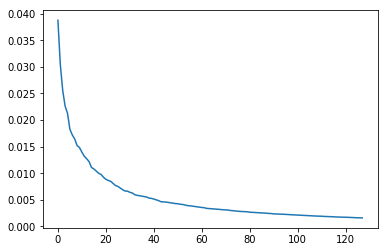

In [30]:
import matplotlib.pyplot as plt
plt.figure
plt.plot(pca.explained_variance_ratio_)


In [31]:
pca1=principalComponents[:,0]
pca2=principalComponents[:,1]
task_label == target

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

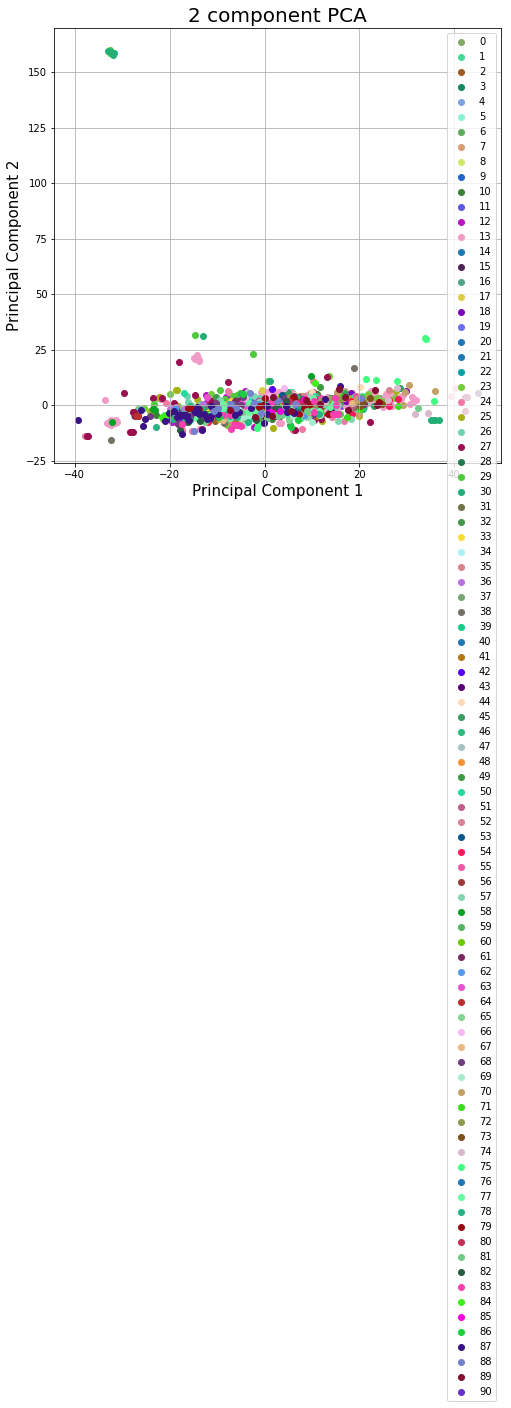

In [32]:
colors = list(np.random.choice(range(256), size=(91,3)))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(91)
for target, color in zip(targets,colors):
    indicesToKeep = task_label == target
    indicesToKeep = np.squeeze(indicesToKeep.T)
    ax.scatter(principalComponents[indicesToKeep.T,0]
               , principalComponents[indicesToKeep.T,1]
               , c = np.random.rand(3,))
ax.legend(targets)
ax.grid()


In [33]:
def eval_metric(features,task_labels):
    from sklearn.metrics import silhouette_score
    silhouette_metric = silhouette_score(X=features,labels=task_labels.ravel(),metric='euclidean')
    return silhouette_metric

In [34]:
eval_metric(principalComponents,task_label)

-0.13487635575417958

In [35]:
def plot_tsne(features,task_labels):
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2).fit_transform(features)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 

    targets = np.unique(task_labels)
    for target in targets:
        indicesToKeep = task_labels == target
        indicesToKeep = np.squeeze(indicesToKeep.T)
        ax.scatter(X_embedded[indicesToKeep.T,0]
                   , X_embedded[indicesToKeep.T,1]
                   , c = np.random.rand(3,))
    ax.grid()
    ax.legend(targets)
    return X_embedded

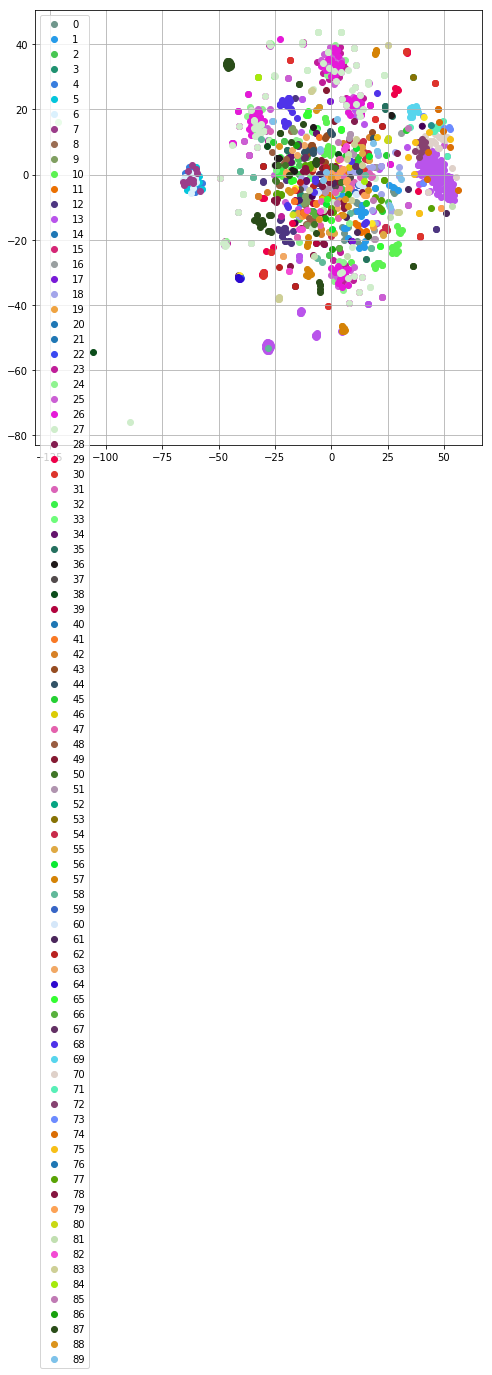

In [36]:
X_embedded = plot_tsne(principalComponents,task_label)

In [25]:
import scipy.io as scio
mat={}
mat['pca_features'] = principalComponents
mat['pca_tsne'] = X_embedded
scio.savemat(file_name='pca_features',mdict=mat)

In [38]:
import pickle
pickle_out = open("pca_features.pickle","wb")
pickle.dump(principalComponents, pickle_out)
pickle.dump(X_embedded, pickle_out)
pickle.dump(pca, pickle_out)
pickle_out.close()